This is an old notebook containing training of Fredkin gates *before* the functionality to have specific relations between the interaction parameters was introduced. Among other things, we here reproduce the results of Banchi et al. (npjqi 2016) with 3+1 networks and test training in similar situations.

The content of this notebook is mostly obsolete (and mostly won't work due to syntax changes). Refer to (e.g.) [toffoli_only_diagonal_from_reduced_expression.ipynb](./toffoli_only_diagonal_from_reduced_expression.ipynb) for modern syntax usage.

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import qutip
import theano
import theano.tensor as T
from collections import OrderedDict
import itertools
import os
import sys

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from qubit_network.QubitNetwork import QubitNetwork
import qubit_network as qn
import qubit_network.net_analysis_tools as nat

from utils import *

pairs = list(itertools.combinations(range(4), 2))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Nets implementing the Fredkin gate that have already been computed:

In [7]:
import glob
glob.glob('../data/nets/fredkin*')

['../data/nets/fredkin.pickle',
 '../data/nets/fredkin_good.pickle',
 '../data/nets/fredkin_3q+1a_paperTopology_1fid.pickle',
 '../data/nets/fredkin_shit.pickle',
 '../data/nets/fredkin_best.pickle',
 '../data/nets/fredkin_3q+1a_allpairs_z_0.996fid.pickle',
 '../data/nets/fredkin_Banchietal.pickle']

# Fidelity 1 for Fredkin, with all pairwise interactions but only Z self-interactions.
Interestingly, the resulting unitary corresponds to a Fredkin if the ancilla is 0, and to a *not-Fredkin* (that is, a swap on second and third qubit if the first one is 0) if the ancilla is 1.
In other words, the obtained unitary is
$$
\lvert 0 \rangle\!\langle 0 \rvert \otimes
SWAP \otimes
\lvert 1 \rangle\!\langle 1 \rvert
+
\lvert 1 \rangle\!\langle 1 \rvert \otimes
SWAP \otimes
\lvert 0 \rangle\!\langle 0 \rvert \\
+ \lvert 0 \rangle\!\langle 0 \rvert \otimes
\mathbb{1} \otimes
\lvert 0 \rangle\!\langle 0 \rvert +
\lvert 1 \rangle\!\langle 1 \rvert \otimes
\mathbb1 \otimes
\lvert 1 \rangle\!\langle 1 \rvert
$$

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


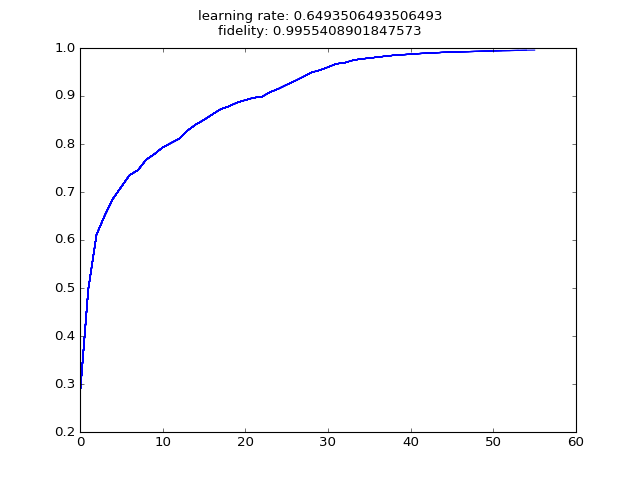

Finished training
Final fidelity: 0.9952059852258164


In [200]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['xx', 'xy', 'xz', 'yx', 'yy', 'yz', 'zx', 'zy', 'zz', 'z'])
#     J=new_Jvalues
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=200,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
#     saveafter_file='nets/fredkin_best.pickle'
)

Fidelity: 0.9999885846905897


<IPython.core.display.Javascript object>


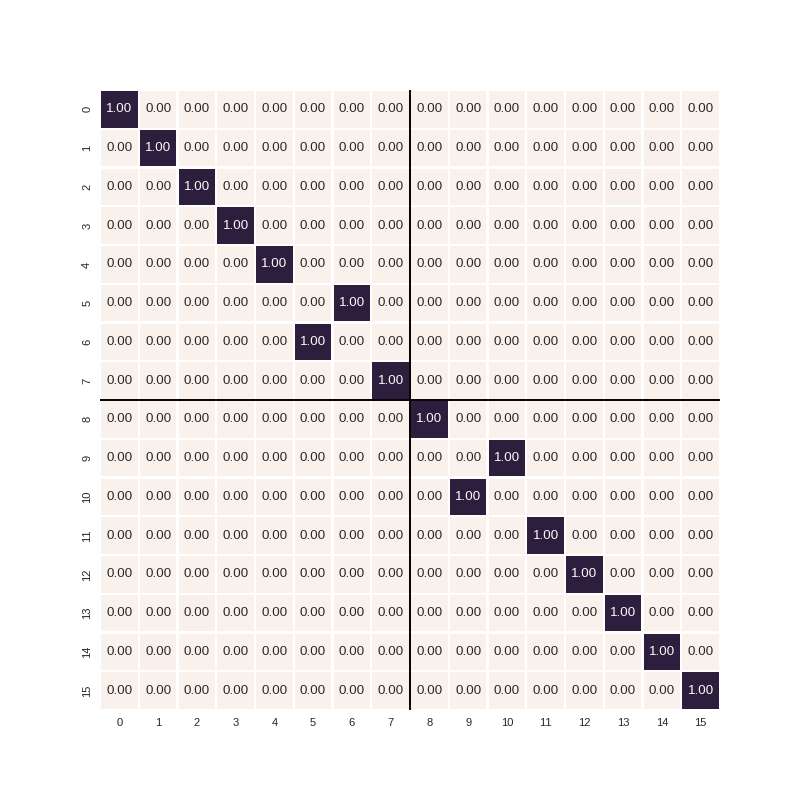

In [5]:
net = qn.load_network_from_file('../data/nets/fredkin_best.pickle')

print('Fidelity: {}'.format(net.test_fidelity_without_theano(n_samples=100)))

plot_gate(net, permutation=[3, 0, 1, 2], hvlines=[8])

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


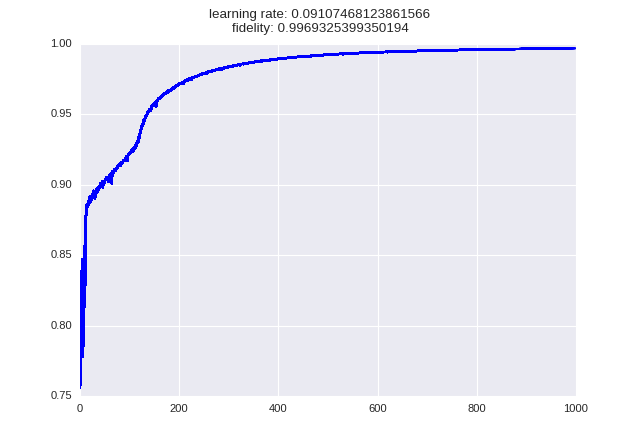

Finished training
Final fidelity: 0.9969874313140589


In [8]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
)
net.J.set_value(net.J.get_value() + 10. * np.ones_like(net.J.get_value()))
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=1000,
    test_dataset_size=100,
    decay_rate=.01
)

In [9]:
net.save_to_file('../data/nets/fredkin_all_21070402.pickle')

[  8.98313281   8.37969149   9.3537639   10.8586698   11.88921396
   9.97753264   7.42805175   8.74198587  10.05316449   8.54294651
   9.89007296  10.46046354  10.09464282  10.48210736   8.97893472
   9.99305808]
Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


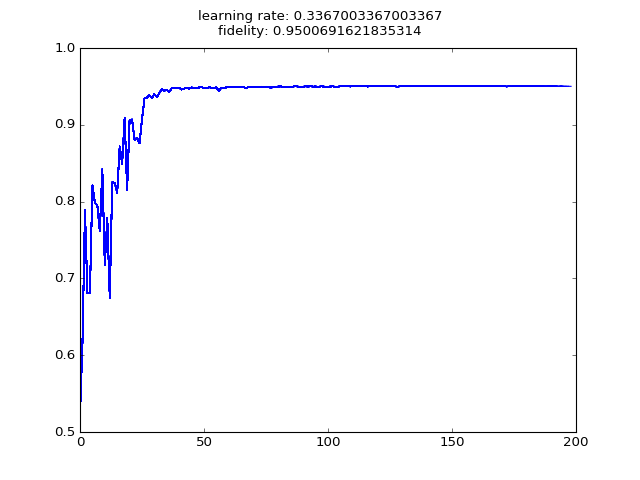

Finished training
Final fidelity: 0.9457288653266597


In [7]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['yy', 'zz', 'z'])
)
net.J.set_value(net.J.get_value() + 10. * np.ones_like(net.J.get_value()))
print(net.J.get_value())
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


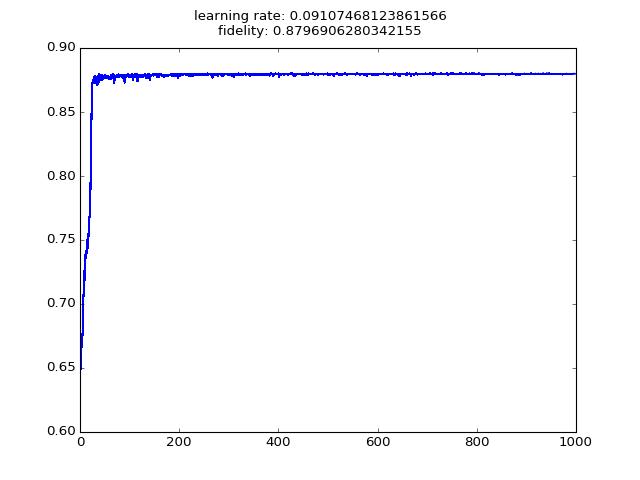

Finished training


In [180]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['yy', 'zz', 'z'])
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


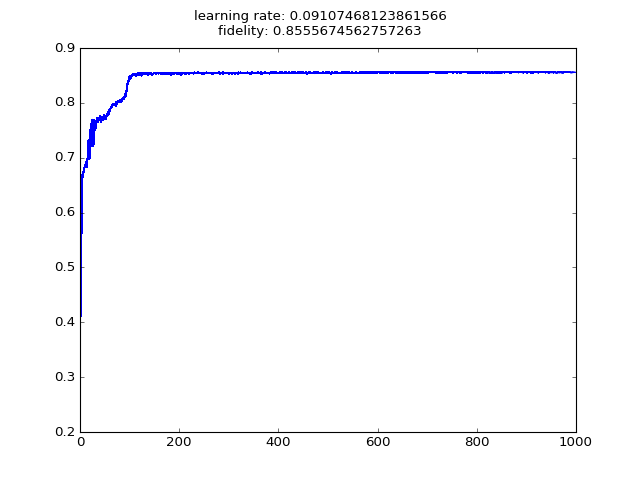

Finished training


In [182]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['xx', 'yy', 'zz', 'x', 'y', 'z'])
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


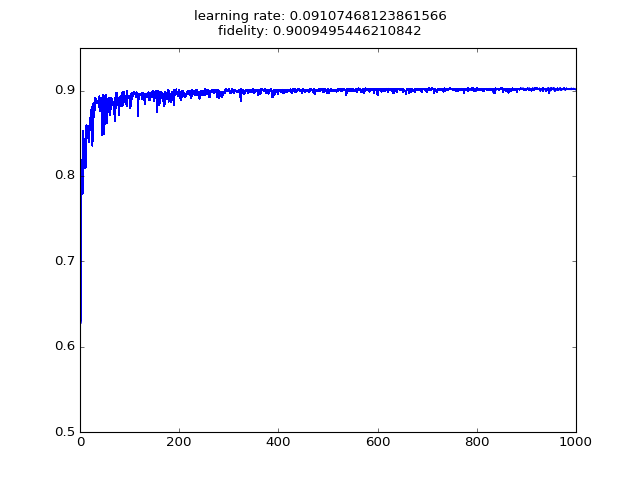

Finished training


In [184]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['xx', 'yy', 'zz', 'xy', 'x', 'y', 'z'])
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

# Fidelity 1 with interactions from *Banchi et. al*.
The resulting total unitary is tensor product of Fredkin over the system and another gate over the ancilla.
We also note that the gate operating over the ancilla is real over the diagonal and imaginary in the off-diagonal terms.

<IPython.core.display.Javascript object>


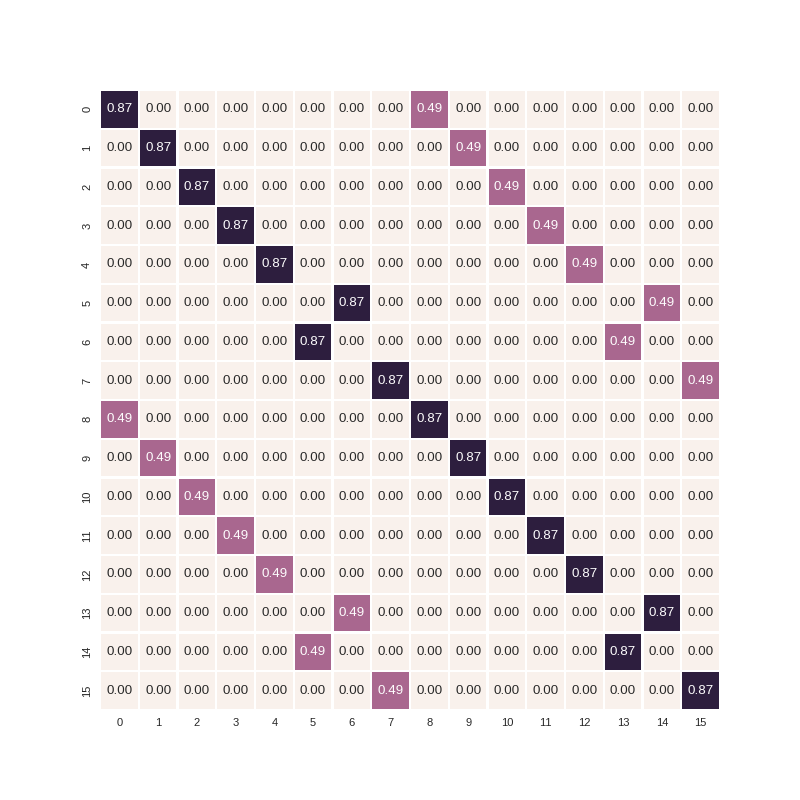

In [3]:
net = qn.load_network_from_file('../data/nets/fredkin_Banchietal.pickle')
plot_gate(net, permutation=[3, 0, 1, 2], func='abs')

# Fredkin without ancilla, with all interactions on:

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


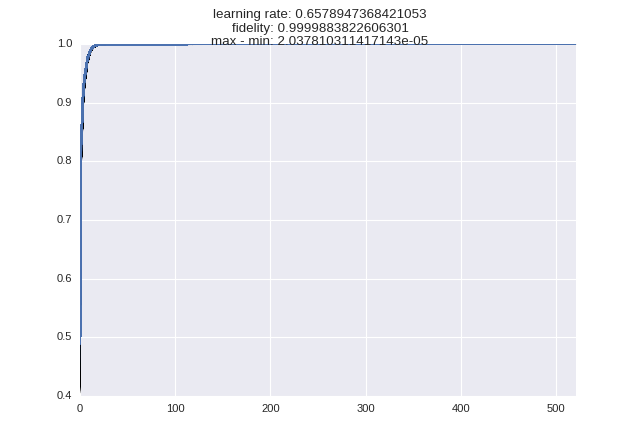

Finished training
Final fidelity: 0.9999881214549987


In [2]:
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions='all'
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=100,
    decay_rate=.001
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


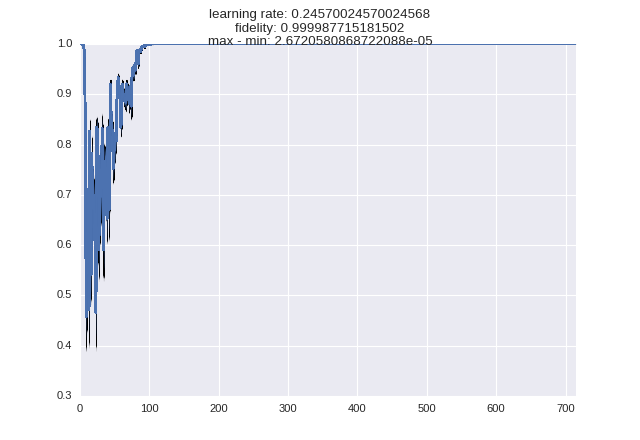

Finished training
Final fidelity: 0.9999858215267408


In [6]:
qn.sgd_optimization(
    net=net,
    learning_rate=2,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=10,
    test_dataset_size=100,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


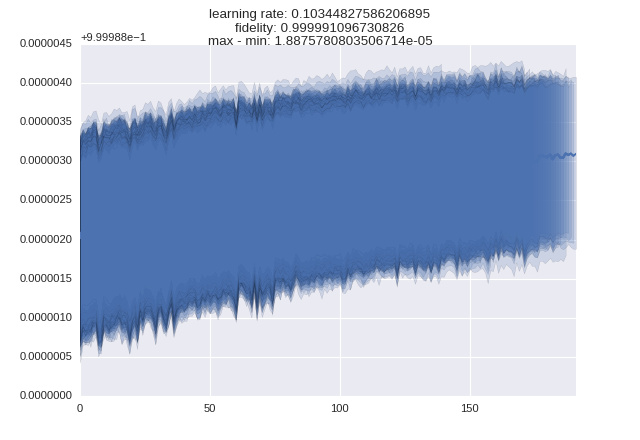

Finished training
Final fidelity: 0.9999916267444395


In [24]:
qn.sgd_optimization(
    net=net,
    learning_rate=.3,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=200,
    decay_rate=.01
)

In [85]:
filenames = glob.glob('../data/nets/fredkin_3q_all*pickle')
for filename in filenames:
    net = qn.load_network_from_file(filename)
    fid = net.test_fidelity_without_theano(n_samples=400)
    phase = np.angle(net.get_current_gate()[0, 0])
    print(filename, fid, phase)

../data/nets/fredkin_3q_all_0.9999fid.pickle 0.999986546985 -0.392544625916
../data/nets/fredkin_3q_all_0.99999fid.pickle 0.999990897335 -2.74883058444


In [89]:
filenames = glob.glob('../data/nets/toffoli_3q_all*pickle')
for filename in filenames:
    net = qn.load_network_from_file(filename)
    fid = net.test_fidelity_without_theano(n_samples=400)
    phase = np.angle(net.get_current_gate()[0, 0])
    print(filename, fid, phase)

../data/nets/toffoli_3q_all_1fid.pickle 1.0 -1.17809724238
../data/nets/toffoli_3q_all_0.9999fid.pickle 0.999905960246 0.39344317157
